In [1]:
#Import functions

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

#read the dataset:
df=pd.read_csv("wdbc.csv",header=None)

In [2]:
#data preprocessing:
df.drop(0,axis=1,inplace=True)
df[1]=df[1].map({'M':1, 'B':0})


In [3]:
#data normalization and split dataset
ndf= (df-df.min())/(df.max()-df.min())

Traindf,Testdf=train_test_split(ndf, test_size = 0.1,random_state=1)
Traindf,Valdf=train_test_split(ndf,test_size=0.1,random_state=1)

In [4]:
#extract features
train_x= Traindf[Traindf.loc[:,Traindf.columns!=1].columns]
train_y=Traindf[Traindf.loc[:,Traindf.columns==1].columns]
test_x=Testdf[Testdf.loc[:,Testdf.columns!=1].columns]
test_y=Testdf[Testdf.loc[:,Testdf.columns==1].columns]
vald_x=Valdf[Valdf.loc[:,Valdf.columns!=1].columns]
vald_y=Valdf[Valdf.loc[:,Valdf.columns==1].columns]

train_x=np.asarray(train_x)
train_y=np.asarray(train_y)
test_x=np.asarray(test_x)
test_y =np.asarray(test_y)
vald_x=np.asarray(vald_x)
vald_y=np.asarray(vald_y)

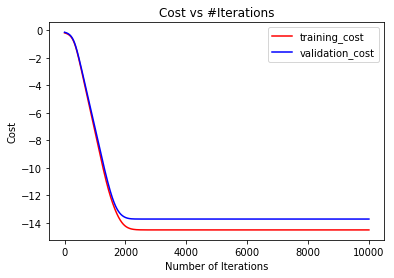

In [5]:
# intialize weight,bias and learning rate

learning_rate=0.01
b = 0
W=np.zeros((train_x.shape[1],1))
m=train_x.shape[0] 
cost=[]
cost_validation=[]

def sigmoid(X):
        return 1/(1+np.exp(-X)) 

def loss(a,train_y):
        positive_loss=-train_y.T*np.log(a+0.0000000001)
        negative_loss=(1-train_y.T)*np.log(1-a+0.0000000001)
        loss=np.mean(positive_loss+negative_loss)
        return loss



for epochs in range(10000):
        z=np.dot(train_x,W)+b
        zv=np.dot(vald_x,W)+b
        a=sigmoid(z)
        a1=sigmoid(zv)
        loss_Train_value=loss(a,train_y)
        loss_Val_value=loss(a1,vald_y)
        cost.append(loss_Train_value)
        cost_validation.append(loss_Val_value)
        dw=(1/m)*np.dot(train_x.T,(train_y-a))
        db=(1/m)*np.sum(train_y-a)
        W=W-learning_rate*dw
        b=b-learning_rate*db
    
    
plt.plot(cost,'red', label='training_cost')
plt.plot(cost_validation,'b', label='validation_cost')

plt.title("Cost vs #Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

plt.legend(loc= 'upper right')


   


In [6]:
 
def predict(X,W,b):
            W=np.zeros((X.shape[1],1))
            m=X.shape[0]
            predict_value=np.zeros((1,m))
            P=sigmoid(np.dot(X,W)+b)
            for i in range (P.shape[1]):
                if(P[0,i]<0.5):
                    predict_value[0,i]=0
                else:
                    predict_value[0,i]=1
            return  predict_value  

def confusion_accuracy(val_true,val_predict):
        confusion=confusion_matrix(val_true,val_predict.T)
        value_accuracy_numerator=confusion[0][0]+confusion[1][0]
        value_accuracy_denominator=confusion[0][0]+confusion[0][1]+confusion[1][0]+confusion[1][1]
        value_accuracy= value_accuracy_numerator/value_accuracy_denominator
        precision_value=confusion[0][0]/(confusion[0][0]+confusion[1][0])
        recall_value=confusion[0][0]/(confusion[0][0]+confusion[0][1])
        
        print("Accuracy {}:".format(value_accuracy))
        print("precision {}:".format(precision_value))
        print("recall {}: ".format(recall_value))
        return value_accuracy



for epochs in range(10000):
        predict_val=predict(vald_x,W,b)
        predict_test=predict(test_x,W,b)
        test_accuracy= confusion_accuracy(test_y,predict_test)
        val_accuracy=confusion_accuracy(vald_y,predict_val)
        

        

    

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705

Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.58

recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824561403508771:
precision 0.5892857142857143:
recall 0.9705882352941176: 
Accuracy 0.9824